# Data Generation

Create a script that generates random data from different distributions. Compare: (a) a normal or Gaussian distribution for different values of the variance and mean, (b) a uniformly random distribution, (c) the beta distribution. 

In [12]:
# Generate the data required by problems 1, 2 and 3
# Ouput is a csv file with one column for each combination of distribution and corresponding variations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# General parameters

N = 100000                # Number of samples
Seed = 100013059        # Seed for reproducibility
output_file_path = f"./data_{N}_{Seed}.csv"
plot = True

rng = np.random.default_rng(seed=Seed)
df = pd.DataFrame()
df.index.name = "sample"

def plot_columns(df, ncols, nrows, title, figsize=(12, 9), max_height=1):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.suptitle(title)
    for i in range(nrows):
        for j in range(ncols):
            index = i*ncols + j
            data = df[df.columns[index]]
            subtitle = df.columns[index]
            ax = axes[i, j]
            ax.set_title(subtitle)
            ax.set_xlabel("x")
            # split the x range in 50 bins
            counts, bin_edges = np.histogram(data, bins=50, density=True)
            # use the center of the bins for representation
            x = (bin_edges[:-1] + bin_edges[1:]) / 2
            ax.plot(x,counts,label="PDF")
            ax.set_ylim(0, max_height)
            ax.legend()
    plt.tight_layout()
    plt.show()

## Normal/Gaussian distribution

A continuous gaussian distribution with mean $\mu$ and variance $\sigma²$ has the following probability density function:

$$f(x|\mu,\sigma²)=\frac{1}{\sigma\sqrt{2\pi}}\exp{-\frac{(x-\mu)²}{2\sigma}}$$

We can generate a sequence of values following normal distribution with given mean and variance with [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

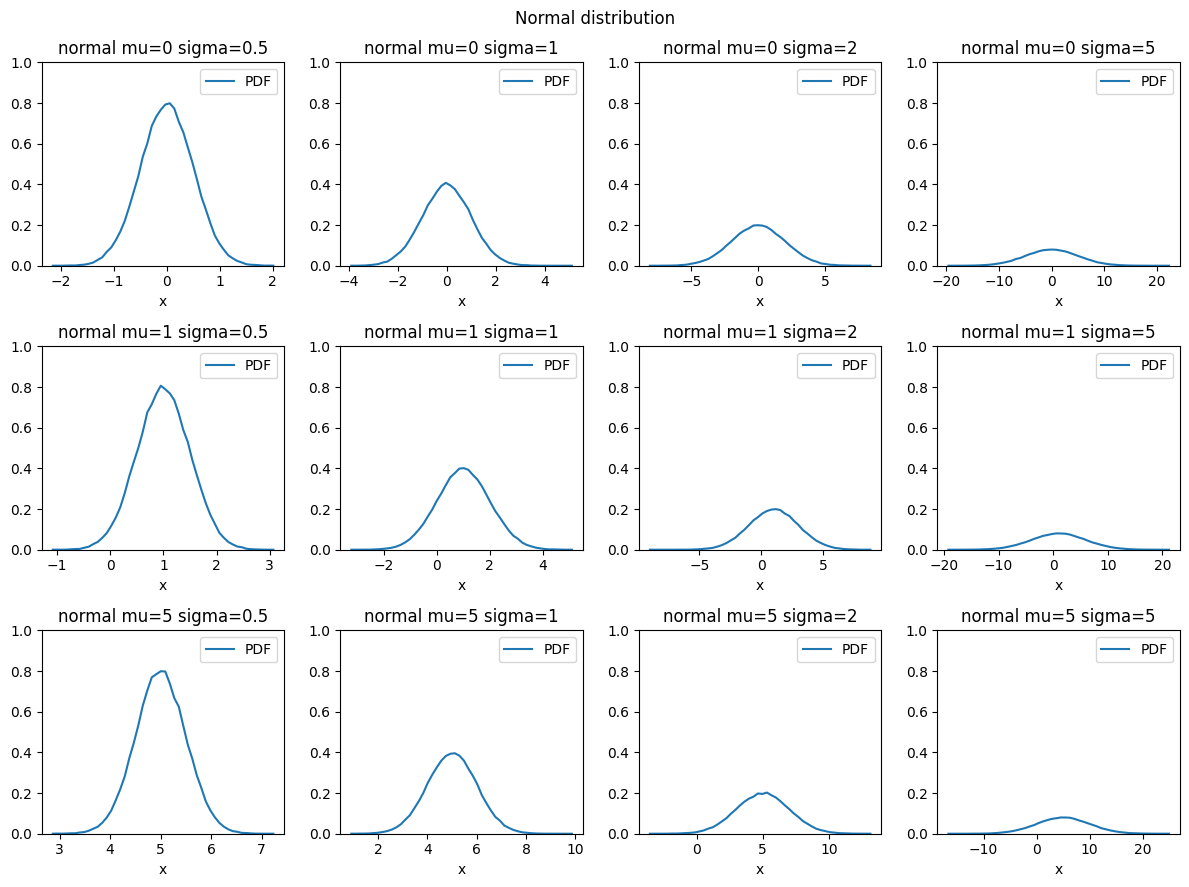

In [13]:
# Normal/Gaussian distribution

normal_mean_values = [0, 1, 5]
normal_sigma_values = [0.5, 1, 2, 5]
for mu in normal_mean_values:
    for sigma in normal_sigma_values:
        df[f"normal mu={mu} sigma={sigma}"] = rng.normal(mu, sigma, size=N)
plot_columns(df.filter(like="normal", axis=1),4,3,"Normal distribution")

The probability density function of gaussian distribution is a bell-shaped function centered on the mean value. Its height is inversely proportional to the standard deviation $\sigma$. The larger the variance the wider the bell.

## Uniform distribution

A continuous uniform distribution within interval [a,b] has the following probability density function

$$f(x)=\frac{1}{b-a}$$

for $a \le x \lt b$ and 0 otherwise

The mean is: $$\mu=\frac{a+b}{2}$$

And the variance is $$\sigma²=\frac{(b-a)²}{12}$$

Ref: [Continuous uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

For a given pair of mean and variance values we can choose an interval that satisfies the above relations

$$a=\mu-\sqrt{3}\sigma$$
$$b=\mu+\sqrt{3}\sigma$$

We can generate a sequence of values following uniform distribution within interval [a,b) with [numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html).

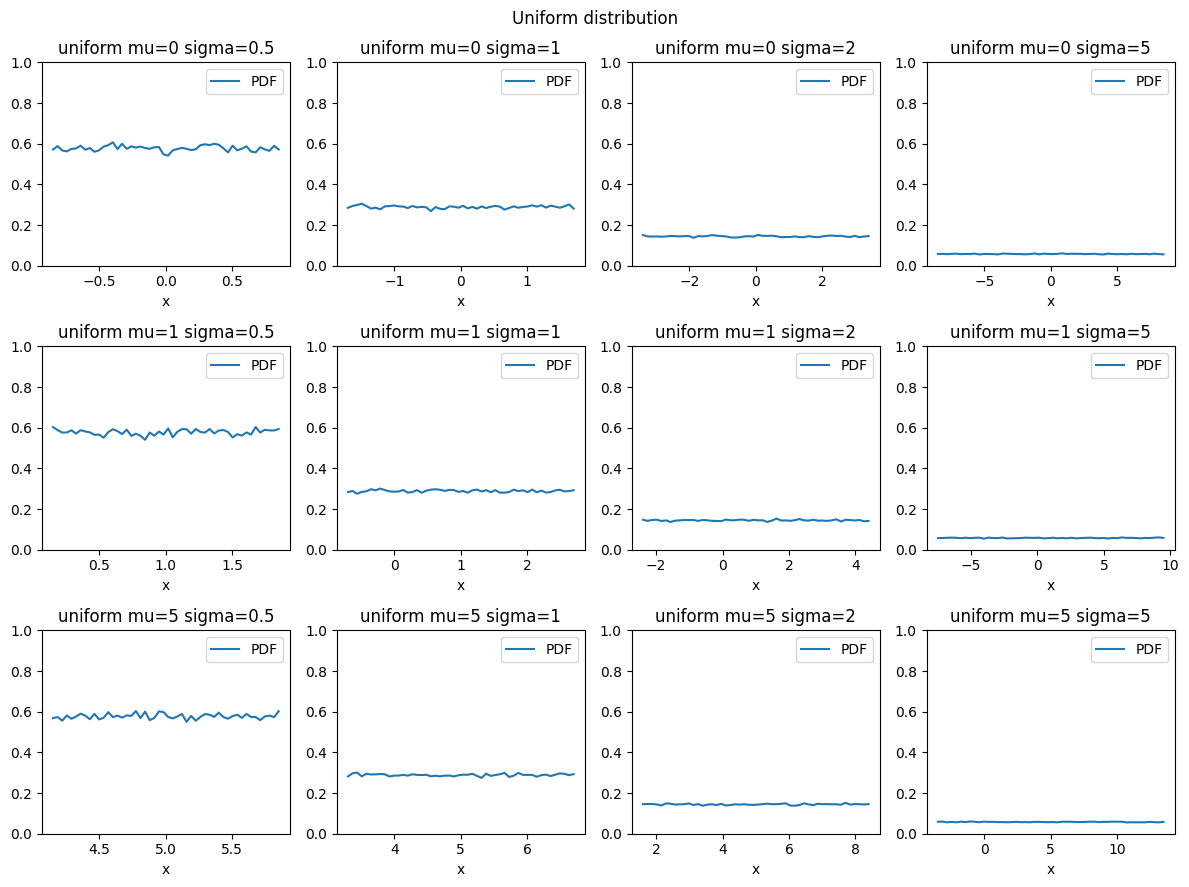

In [14]:
# Uniformly random distribution

uniform_mean_values = [0, 1, 5]
uniform_sigma_values = [0.5, 1, 2, 5]
for mu in uniform_mean_values:
    for sigma in uniform_sigma_values:
        a = mu-np.sqrt(3)*sigma
        b = mu+np.sqrt(3)*sigma
        df[f"uniform mu={mu} sigma={sigma}"] = rng.uniform(a, b, size=N)
plot_columns(df.filter(like="uniform", axis=1),4,3,"Uniform distribution")



The probability density function of the uniform dstribution is a horizontal segment between de limits of the interval [a,b], centered horizontally in the middle point of the interval. Its height is inversely proportional to the interval width (b-a). Its standard deviation is directly proportional to the inerval width.

## Beta distribution

A continuous beta distribution has the following probability distribution function:

$$f_X(x)=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$$

for $0\lt x \lt 1$ with beta function defined as:

$$B(\alpha,\beta)=\int_{0}^{1}x^{\alpha-1}(1-x)^{\beta-1}\,dx$$

Mean:

$$\mu = \frac{\alpha}{\alpha+\beta}$$

Variance:

$$\sigma^2 = \frac{\alpha \beta}{(\alpha+\beta+1)(\alpha+\beta)^2}$$

For a given pair of mean and variance values we can choose a pair of $\alpha$ and $\beta$ that satisfies the above relations

$$\alpha=\mu(\frac{\mu(1-\mu)}{\sigma^2}-1)$$
$$\beta=(1-\mu)(\frac{\mu(1-\mu)}{\sigma^2}-1))$$

We can generate a sequence of values following uniform distribution within interval [a,b) with [numpy.random.beta](https://numpy.org/doc/stable/reference/random/generated/numpy.random.beta.html).

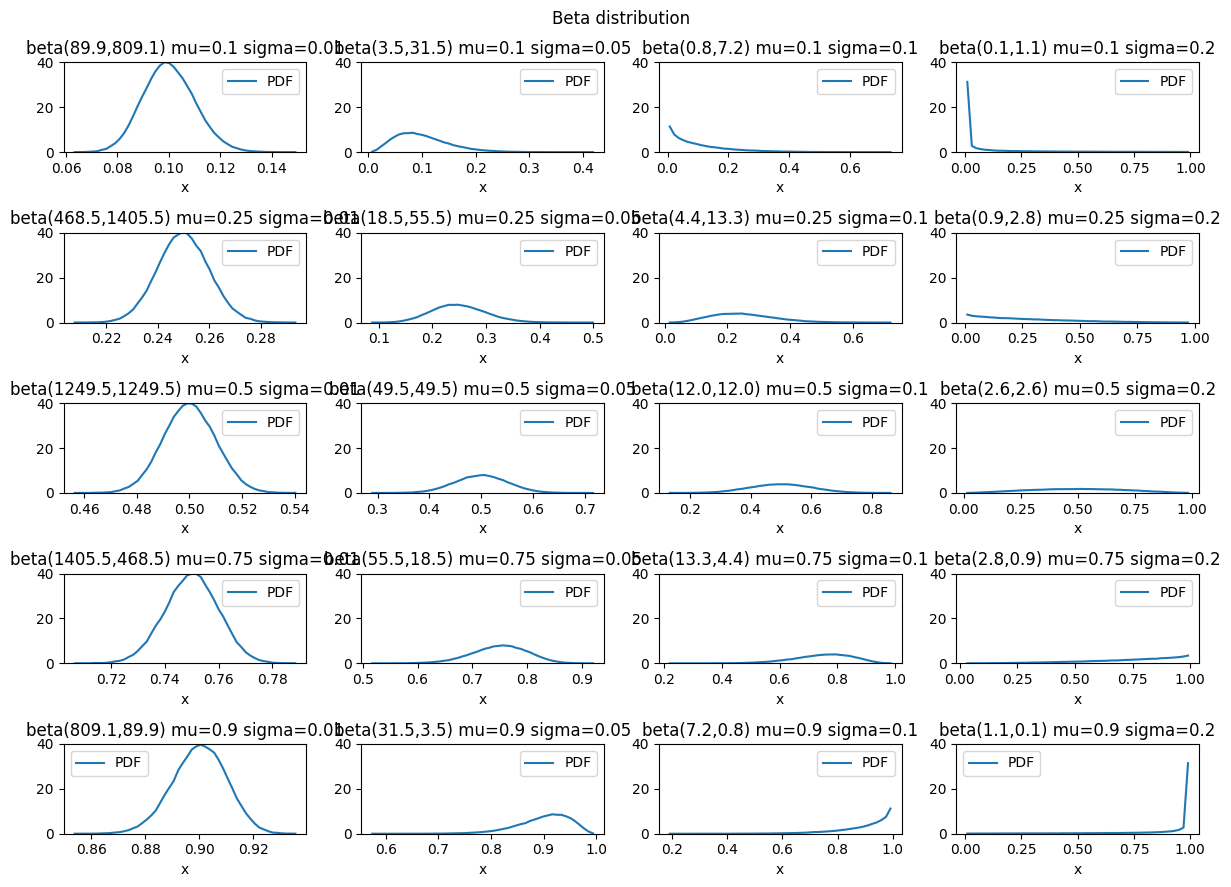

In [ ]:
# Beta distribution

beta_mean_values = [0.1, 0.25, 0.5, 0.75, 0.9]
beta_sigma_values = [0.01, 0.05, 0.1, 0.2]
for mu in beta_mean_values:
    for sigma in beta_sigma_values:
        alpha = mu*(mu*(1-mu)/(sigma*sigma)-1)
        beta = alpha*(1-mu)/mu
        df[f"beta({alpha:.1f},{beta:.1f}) mu={mu} sigma={sigma}"] = rng.beta(alpha, beta, size=N)
plot_columns(df.filter(like="beta", axis=1),4,5,"Beta distribution", figsize=(16, 9), max_height=42)



The probability density function of a beta distribution is defined in the [0, 1] interval.

## Save to file

In [16]:
df.to_csv(output_file_path)